In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from scipy import stats
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df_1 = pd.read_csv('/content/drive/MyDrive/Naist_internship/Internship_expt.csv', header=1)
print(df_1)

   No. Name  Cmd1  Cmd2  Cmd3  Cmd4  Cmd5  Cmd6  Cmd7
0    1    a     4     5     3     3     1     7     1
1    2    b     7     1     3     4     6     7     2
2    3    c     2     1     6     1     2     4     5
3    4    a     7     1     6     7     2     5     3
4    5    b     5     1     5     4     5     3     2
5    6    c     1     7     4     6     5     3     6
6    7    a     2     4     7     5     6     6     6
7    8    b     1     3     4     4     6     6     5
8    9    c     2     5     2     1     4     5     7
9   10    a     4     2     7     5     4     6     2


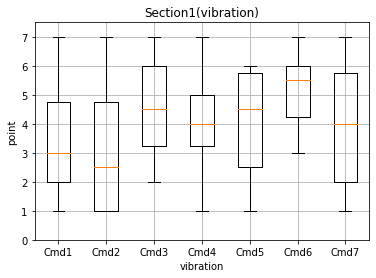

In [45]:
# 箱ひげ図
Cmd1_list = list(df_1['Cmd1'])
Cmd2_list = list(df_1['Cmd2'])
Cmd3_list = list(df_1['Cmd3'])
Cmd4_list = list(df_1['Cmd4'])
Cmd5_list = list(df_1['Cmd5'])
Cmd6_list = list(df_1['Cmd6'])
Cmd7_list = list(df_1['Cmd7'])
points = (Cmd1_list, Cmd2_list,Cmd3_list, Cmd4_list,Cmd5_list, Cmd6_list,Cmd7_list)
fig, ax = plt.subplots()
bp = ax.boxplot(points)
ax.set_xticklabels(['Cmd1', 'Cmd2','Cmd3', 'Cmd4', 'Cmd5', 'Cmd6', 'Cmd7' ])
#plt.boxplot(df_1['Cmd1'])
plt.title('Section1(vibration)')
plt.xlabel('vibration')
plt.ylabel('point')
plt.ylim([0,7.5])
plt.grid() 

In [ ]:
#Scipy_doucuments:http://www.turbare.net/transl/scipy-lecture-notes/intro/scipy.html#scipy
#Scipy_myuse:http://www.turbare.net/transl/scipy-lecture-notes/packages/statistics/index.html
#Scipy(3つ以上の母集団の比較)https://whitewell.sakura.ne.jp/PythonProbStat/Python-statistics6.html

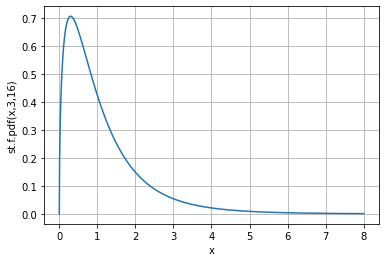

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
x=np.linspace(0,8,1000)
plt.plot(x,st.f.pdf(x,3,16))
plt.xlabel('x')
plt.ylabel('st.f.pdf(x,3,16)')
plt.grid()

In [47]:
help(st.f_oneway)

Help on function f_oneway in module scipy.stats.stats:

f_oneway(*args)
    Perform one-way ANOVA.
    
    The one-way ANOVA tests the null hypothesis that two or more groups have
    the same population mean.  The test is applied to samples from two or
    more groups, possibly with differing sizes.
    
    Parameters
    ----------
    sample1, sample2, ... : array_like
        The sample measurements for each group.
    
    Returns
    -------
    statistic : float
        The computed F-value of the test.
    pvalue : float
        The associated p-value from the F-distribution.
    
    Notes
    -----
    The ANOVA test has important assumptions that must be satisfied in order
    for the associated p-value to be valid.
    
    1. The samples are independent.
    2. Each sample is from a normally distributed population.
    3. The population standard deviations of the groups are all equal.  This
       property is known as homoscedasticity.
    
    If these assumptions are n

In [52]:
import numpy as np
# 4つの指導法に違いがあるか?
A = np.array(Cmd1_list)
B = np.array(Cmd2_list)
C = np.array(Cmd3_list)
D = np.array(Cmd4_list)
f, p = st.f_oneway(A, B, C, D)
print("F=%f, p-value = %f"%(f,p))
st.bartlett(A, B, C, D) # Bartlett検定

F=1.258964, p-value = 0.302989


BartlettResult(statistic=0.6372172669631915, pvalue=0.8878619356704975)

F=7.111111, p-value = 0.002988


# 新しいセクション